In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Titanic Classifier Dataset [Downloaded From Kaggle]
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Preprocess the data
titanic_data['Age'] = titanic_data['Age'].fillna(np.mean(titanic_data['Age']))
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Convert string values to numerical values
string_columns = [col for col in titanic_data.columns if titanic_data[col].dtype == 'object']

for col in string_columns:
    titanic_data[col] = titanic_data[col].astype('category').cat.codes

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,-1,2


In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop(['Survived'], axis=1), titanic_data['Survived'], test_size=0.2, random_state=42)

In [6]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Create a Random Forest classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [8]:
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
clf = RandomForestClassifier(**best_params)

In [9]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=8, n_estimators=300)

In [10]:
# Make predictions
y_pred = clf.predict(X_test)

In [11]:
# Calculate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print('Total accuracy of the model: {}'.format(accuracy))

Total accuracy of the model: 0.8268156424581006


In [12]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

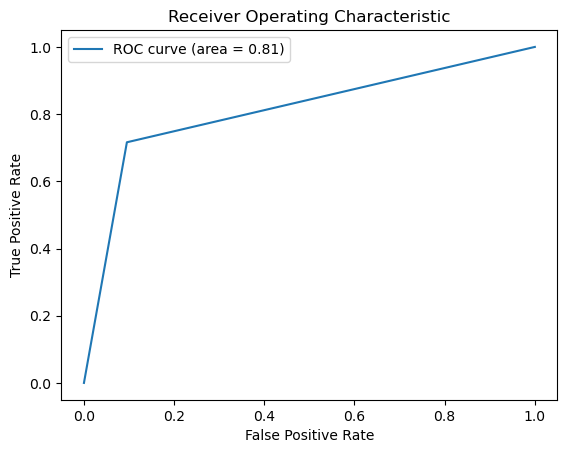

In [13]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [14]:
# Define a function to predict survival based on custom input
def predict_survival(passenger_info):
    # Convert passenger information to numerical values
    passenger_info = [passenger_info[col] for col in X_train.columns]
    passenger_info = scaler.transform([passenger_info])

    # Make a prediction
    prediction = clf.predict(passenger_info)

    return prediction

In [15]:
# Get custom input from the user
while True:
    try:
        passenger_id = int(input('Enter the passenger ID: '))
        break
    except ValueError:
        print('Invalid passenger ID. Please enter an integer.')

Enter the passenger ID: 1


In [16]:
passenger_info = {
    'PassengerId': passenger_id,
    'Pclass': int(input('Enter the passenger class (1, 2, or 3): ')),
    'Name': input('Enter the passenger name: '),
    'Sex': input('Enter the passenger sex (male or female): '),
    'Age': float(input('Enter the passenger age: ')),
    'SibSp': int(input('Enter the number of siblings and spouses aboard: ')),
    'Parch': int(input('Enter the number of parents and children aboard: ')),
    'Ticket': input('Enter the ticket number: '),
    'Fare': float(input('Enter the ticket fare: ')),
    'Cabin': input('Enter the cabin number: '),
    'Embarked': input('Enter the port of embarkation (C, Q, or S): ')
}

Enter the passenger class (1, 2, or 3): 1
Enter the passenger name: Srimanth Mantripragada
Enter the passenger sex (male or female): male
Enter the passenger age: 20
Enter the number of siblings and spouses aboard: 1
Enter the number of parents and children aboard: 2
Enter the ticket number: A/5 21171
Enter the ticket fare: 75
Enter the cabin number: C85
Enter the port of embarkation (C, Q, or S): S


In [17]:
# Convert the input to a pandas DataFrame
passenger_info_df = pd.DataFrame(passenger_info, index=[0])

In [18]:
# Convert string values to numerical values
string_columns = [col for col in passenger_info_df.columns if passenger_info_df[col].dtype == 'object']
for col in string_columns:
    passenger_info_df[col] = passenger_info_df[col].astype('category').cat.codes

# Scale the input data
passenger_info_scaled = scaler.transform(passenger_info_df)

In [19]:
# Make a prediction
prediction = clf.predict(passenger_info_scaled)

# Print the prediction
if prediction == 1:
    print('The passenger is predicted to survive.')
else:
    print('The passenger is predicted not to survive.')

The passenger is predicted to survive.
